<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [130]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('/Users/howardyan/Desktop/Data Accelerator/Linear Regression/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


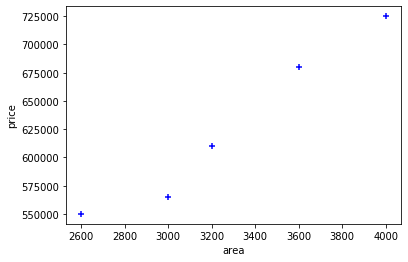

In [26]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='blue',marker='+')

In [42]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [28]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [43]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**(1) Predict price of a home with area = 3300 sqr ft**

In [30]:
reg.predict([[3300]])

array([628715.75342466])

In [44]:
reg.coef_

array([135.78767123])

In [45]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [46]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [34]:
reg.predict([[5000]])

array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [51]:
area_df = pd.read_csv("/Users/howardyan/Desktop/Data Accelerator/Linear Regression/areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [50]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [38]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [40]:
area_df.to_csv("prediction.csv")

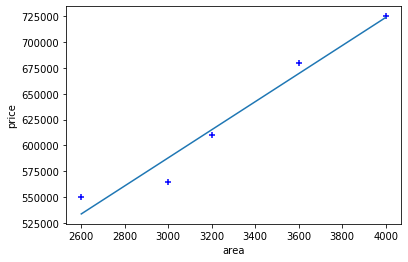

In [60]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='blue',marker='+')
plt.plot(df.area,reg.predict(df[['area']]))

In [62]:
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [63]:
df['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

In [66]:
canada=pd.read_csv('/Users/howardyan/Desktop/Data Accelerator/Linear Regression/canada_per_capita_income.csv')
canada.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


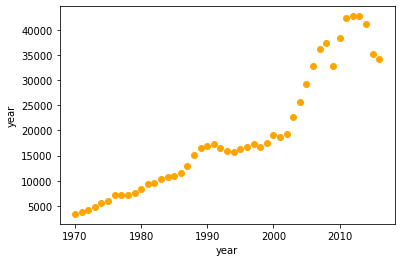

In [80]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('year')
plt.scatter(canada[['year']],canada[['per capita income (US$)']],color='orange')

In [88]:
canada.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [89]:
year=canada[['year']]
per_capita=canada[['per capita income (US$)']]

In [90]:
reg=linear_model.LinearRegression()
reg.fit(year,per_capita)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
reg.predict([[2020]])

array([[41288.69409442]])

In [108]:
new_year=np.append(year,'2020')
predicted_income=np.append(per_capita,reg.predict([[2020]]))

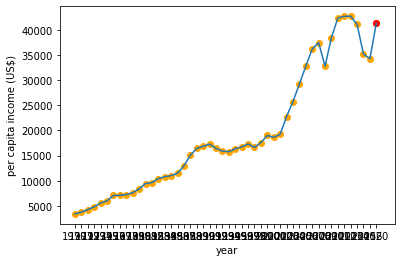

In [129]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(new_year,predicted_income,color='orange')
plt.scatter(new_year[len(predicted_income)-1],predicted_income[len(predicted_income)-1],color='red')
plt.plot(new_year,predicted_income)


In [126]:
len(predicted_income)

48

<h3>Answer</h3>

41288.69409442